# CNN


Redes Neurais Convolucionais \
Classificação de dígitos escritos a mão

In [2]:
# !pip install tensorflow_datasets

     |████████████████████████████████| 4.3 MB 291 kB/s eta 0:00:01
     |████████████████████████████████| 78 kB 338 kB/s eta 0:00:01
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
     |████████████████████████████████| 95 kB 526 kB/s eta 0:00:01
     |████████████████████████████████| 98 kB 472 kB/s eta 0:00:01
     |████████████████████████████████| 51 kB 393 kB/s eta 0:00:01
     |████████████████████████████████| 211 kB 335 kB/s eta 0:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21493 sha256=11d7699db5e1d00d2852754ccb2618081f533a291d5ed4b7a0ca18539cf0e000
  Stored in directory: /home/lucas/.cache/pip/wheels/54/aa/01/724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
Successfully built promise


In [3]:
import numpy as np
import tensorflow_datasets as tfds

2022-06-23 22:15:56.068195: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 22:15:56.068225: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Desta vez vou carregar os dados direto no formato de dataset, separado por split. O parâmetro `as_supervised` faz com que o iterador retorne tuplas no formato `(feature, label)`; se `False`, o iterator retorna itens no formato de dicionário contendo chaves `"image"` e `"label"`.

In [4]:
ds_train, info = tfds.load('mnist', split = 'train', as_supervised = True, with_info = True)

2022-06-23 22:16:08.041556: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


2022-06-23 22:16:21.831931: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-23 22:16:21.831984: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-23 22:16:21.832019: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lucas): /proc/driver/nvidia/version does not exist


In [5]:
info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='~/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [6]:
for feature, label in ds_train.take(1):
    print(feature.shape, label.numpy())
    print(feature.numpy().reshape(28, 28))

(28, 28, 1) 4
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84
  254 101   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 174
  253 119   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31 247
  202  29   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1   0 

2022-06-23 22:17:26.267166: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Como os pixels são inteiros entre 0 e 255, vou definir uma função para transformar os valores no dataset. Já que este dataset produz tuplas contendo (feature, label), a função precisa receber essas duas variáveis e retornar ambas as variáveis com as transformações cabíveis.

In [7]:
def transform(f, l):
    return f/255, l

In [8]:
ds_train = ds_train.map(transform)

Text(0.5, 1.0, 'Classe: 4')

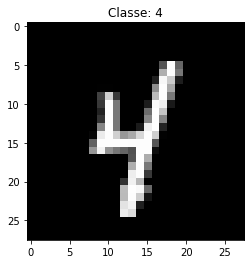

In [9]:
import matplotlib.pyplot as plt
plt.imshow(feature.numpy().reshape(28, 28), cmap = 'gray')
plt.title('Classe: ' + str(label.numpy()))

In [10]:
import tensorflow as tf
tf.random.set_seed(42)

tf.__version__

'2.9.1'

Segundo https://www.tensorflow.org/guide/migrate#using_a_keras_model_definition, no TF 2.x é recomendado usar o Keras para construir modelos. Desta forma, o modelo gerado já vai ser instância de uma classe apropriada, com os métodos necessários para encadeá-lo com outras classes do TF, e também vai definir quais são e acompanhar os parâmetros treináveis. O modelo pode então ser convertido diretamente para um estimador (como explicado no link), ou o estimador pode ser construído manualmente (conforme feito abaixo, na sequência).

Tendo isso em mente, podemos implementar um modelo e realizar o treinamento de três formas diferentes, indo da mais verbosa (que permite um controle mais fino dos processos internos) à menos verbosa (quando o comportamento padrão do treinamento é suficiente). Vou implementar as três formas.

# 1. Forma mais verbosa

Aqui, nós vamos definir uma classe para o modelo. A classe permite definir as camadas e as operações a serem realizadas. Documentação: https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [11]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters = 32, kernel_size = 5, strides = (1, 1), padding = 'same', activation = 'relu')
        self.maxpool = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2)
        self.conv2 = tf.keras.layers.Conv2D(filters = 64, kernel_size = 5, strides = (1, 1), padding = 'same')
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units = 1024, activation = 'relu')
        self.dropout = tf.keras.layers.Dropout(rate = 0.2)
        self.dense2 = tf.keras.layers.Dense(10)
    
    def call(self, inputs, training = False):
        x = self.conv1(inputs)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.maxpool(x) # Apesar de estarmos chamando esta camada duas vezes, como ela não tem nenhum parâmetro treinável, podemos reutilizá-la
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dropout(x, training = training)
        x = self.dense2(x)

        return x

Neste caso, a função que produz o modelo vai retornar uma instância da classe.

In [12]:
def make_model():
    return Model()

Então, podemos definir uma função que vai retornar os `EstimatorSpec`s.

Comparando com a implementação no TF 1.x, as alterações abaixo em `model_fn` foram baseadas em https://www.tensorflow.org/guide/migrate#custom_model_fn_with_tf_20_symbols.

In [13]:
def model_fn(features, labels, mode):
    model = make_model()
    features = tf.cast(features, tf.float32)
    out = model(features, training = (mode == tf.estimator.ModeKeys.TRAIN))
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        loss_obj = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
        loss = loss_obj(labels, out)
        optimizer = tf.keras.optimizers.Adam()
        optimizer.iterations = tf.compat.v1.train.get_or_create_global_step()
        train_op = optimizer.get_updates(loss, model.trainable_variables)[0]
        return tf.estimator.EstimatorSpec(mode = mode, loss = loss, train_op = train_op)

    if mode == tf.estimator.ModeKeys.EVAL:
        predictions = tf.argmax(out, axis = 1)
        loss_obj = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
        loss = loss_obj(labels, out)
        accuracy_obj = tf.keras.metrics.Accuracy()
        accuracy_obj.update_state(y_true = labels, y_pred = predictions)
        return tf.estimator.EstimatorSpec(mode = mode, loss = loss, eval_metric_ops = {'Accuracy': accuracy_obj})

    if mode == tf.estimator.ModeKeys.PREDICT:
        predictions = tf.argmax(out, axis = 1)
        return tf.estimator.EstimatorSpec(mode = mode, predictions = predictions)

In [14]:
classificador = tf.estimator.Estimator(model_fn = model_fn)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp1caeug4_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp1caeug4_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Para usar estimadores, o dataset precisa ser definido dentro de `input_fn`, por isso estou chamando `tfds.load` de novo.

In [15]:
def make_input_fn(dataset_split, num_epochs = None, shuffle = True, batch_size = 128):
    def input_fn():
        if dataset_split == 'train':
            ds = tfds.load('mnist', split = 'train', as_supervised = True)
        if dataset_split == 'test':
            ds = tfds.load('mnist', split = 'test', as_supervised = True)
        ds = ds.map(transform)
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_fn

In [16]:
train_fn = make_input_fn('train')

In [17]:
classificador.train(input_fn = train_fn, steps = 200)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


2022-06-23 22:17:44.158482: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp1caeug4_/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp1caeug4_/model.ckpt.


INFO:tensorflow:/tmp/tmp1caeug4_/model.ckpt-0.index


INFO:tensorflow:/tmp/tmp1caeug4_/model.ckpt-0.index


INFO:tensorflow:0


INFO:tensorflow:0


INFO:tensorflow:/tmp/tmp1caeug4_/model.ckpt-0.data-00000-of-00001


INFO:tensorflow:/tmp/tmp1caeug4_/model.ckpt-0.data-00000-of-00001


INFO:tensorflow:39300


INFO:tensorflow:39300


INFO:tensorflow:/tmp/tmp1caeug4_/model.ckpt-0.meta


INFO:tensorflow:/tmp/tmp1caeug4_/model.ckpt-0.meta


INFO:tensorflow:39400


INFO:tensorflow:39400


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:loss = 2.3100927, step = 0


INFO:tensorflow:loss = 2.3100927, step = 0


INFO:tensorflow:global_step/sec: 2.86068


INFO:tensorflow:global_step/sec: 2.86068


INFO:tensorflow:loss = 0.0892771, step = 100 (34.959 sec)


INFO:tensorflow:loss = 0.0892771, step = 100 (34.959 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 200...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 200...


INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmp1caeug4_/model.ckpt.


INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmp1caeug4_/model.ckpt.


INFO:tensorflow:/tmp/tmp1caeug4_/model.ckpt-200.index


INFO:tensorflow:/tmp/tmp1caeug4_/model.ckpt-200.index


INFO:tensorflow:0


INFO:tensorflow:0


INFO:tensorflow:/tmp/tmp1caeug4_/model.ckpt-200.meta


INFO:tensorflow:/tmp/tmp1caeug4_/model.ckpt-200.meta


INFO:tensorflow:100


INFO:tensorflow:100


INFO:tensorflow:/tmp/tmp1caeug4_/model.ckpt-200.data-00000-of-00001


INFO:tensorflow:/tmp/tmp1caeug4_/model.ckpt-200.data-00000-of-00001


INFO:tensorflow:39400


INFO:tensorflow:39400


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 200...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 200...


INFO:tensorflow:Loss for final step: 0.06753341.


2022-06-23 22:18:58.529090: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
INFO:tensorflow:Loss for final step: 0.06753341.


In [18]:
evaluate_fn = make_input_fn('test', num_epochs = 1, shuffle = False)
results = classificador.evaluate(input_fn = evaluate_fn)
results

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2022-06-23T22:18:58


INFO:tensorflow:Starting evaluation at 2022-06-23T22:18:58


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp1caeug4_/model.ckpt-200


INFO:tensorflow:Restoring parameters from /tmp/tmp1caeug4_/model.ckpt-200


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 9.64588s


INFO:tensorflow:Inference Time : 9.64588s


INFO:tensorflow:Finished evaluation at 2022-06-23-22:19:08


INFO:tensorflow:Finished evaluation at 2022-06-23-22:19:08


INFO:tensorflow:Saving dict for global step 200: Accuracy = 0.9793, global_step = 200, loss = 0.061320025


INFO:tensorflow:Saving dict for global step 200: Accuracy = 0.9793, global_step = 200, loss = 0.061320025


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /tmp/tmp1caeug4_/model.ckpt-200


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /tmp/tmp1caeug4_/model.ckpt-200


{'Accuracy': 0.9793, 'loss': 0.061320025, 'global_step': 200}

In [19]:
predict_fn = make_input_fn('test', num_epochs = 1, shuffle = False)
preds = list(classificador.predict(input_fn = predict_fn))
preds[:10]

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp1caeug4_/model.ckpt-200


INFO:tensorflow:Restoring parameters from /tmp/tmp1caeug4_/model.ckpt-200


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


[2, 0, 4, 8, 7, 6, 0, 6, 3, 1]

# 2. Forma "meio" verbosa

Desta vez, vamos implementar o modelo não como instância de uma classe, mas usando o construtor `tf.keras.Sequential`.

In [20]:
def make_model():
    return tf.keras.Sequential([
                                tf.keras.layers.Conv2D(filters = 32, kernel_size = 5, strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
                                tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
                                tf.keras.layers.Conv2D(filters = 64, kernel_size = 5, strides = (1, 1), padding = 'same'),
                                tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2), # Aqui, como as operações são realizadas na sequência, precisamos discriminar a segunda camada de MaxPooling
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(units = 1024, activation = 'relu'),
                                tf.keras.layers.Dropout(rate = 0.2),
                                tf.keras.layers.Dense(10)
    ])

A função `model_fn` é idêntica, por isso podemos utilizar a mesma implementação.

In [21]:
classificador = tf.estimator.Estimator(model_fn = model_fn)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp3b82nc_j', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp3b82nc_j', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


As funções `train_fn`, `evaluate_fn` e `test_fn` também não mudam.

In [22]:
classificador.train(input_fn = train_fn, steps = 200)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp3b82nc_j/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp3b82nc_j/model.ckpt.


INFO:tensorflow:/tmp/tmp3b82nc_j/model.ckpt-0.index


INFO:tensorflow:/tmp/tmp3b82nc_j/model.ckpt-0.index


INFO:tensorflow:0


INFO:tensorflow:0


INFO:tensorflow:/tmp/tmp3b82nc_j/model.ckpt-0.data-00000-of-00001


INFO:tensorflow:/tmp/tmp3b82nc_j/model.ckpt-0.data-00000-of-00001


INFO:tensorflow:39300


INFO:tensorflow:39300


INFO:tensorflow:/tmp/tmp3b82nc_j/model.ckpt-0.meta


INFO:tensorflow:/tmp/tmp3b82nc_j/model.ckpt-0.meta


INFO:tensorflow:39400


INFO:tensorflow:39400


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:loss = 2.3252444, step = 0


INFO:tensorflow:loss = 2.3252444, step = 0


INFO:tensorflow:global_step/sec: 2.80409


INFO:tensorflow:global_step/sec: 2.80409


INFO:tensorflow:loss = 0.09411052, step = 100 (35.664 sec)


INFO:tensorflow:loss = 0.09411052, step = 100 (35.664 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 200...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 200...


INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmp3b82nc_j/model.ckpt.


INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmp3b82nc_j/model.ckpt.


INFO:tensorflow:/tmp/tmp3b82nc_j/model.ckpt-200.index


INFO:tensorflow:/tmp/tmp3b82nc_j/model.ckpt-200.index


INFO:tensorflow:0


INFO:tensorflow:0


INFO:tensorflow:/tmp/tmp3b82nc_j/model.ckpt-200.meta


INFO:tensorflow:/tmp/tmp3b82nc_j/model.ckpt-200.meta


INFO:tensorflow:100


INFO:tensorflow:100


INFO:tensorflow:/tmp/tmp3b82nc_j/model.ckpt-200.data-00000-of-00001


INFO:tensorflow:/tmp/tmp3b82nc_j/model.ckpt-200.data-00000-of-00001


INFO:tensorflow:39400


INFO:tensorflow:39400


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 200...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 200...
2022-06-23 22:20:29.252576: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


INFO:tensorflow:Loss for final step: 0.056795746.


INFO:tensorflow:Loss for final step: 0.056795746.


In [23]:
results = classificador.evaluate(input_fn = evaluate_fn)
results

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2022-06-23T22:20:42


INFO:tensorflow:Starting evaluation at 2022-06-23T22:20:42


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp3b82nc_j/model.ckpt-200


INFO:tensorflow:Restoring parameters from /tmp/tmp3b82nc_j/model.ckpt-200


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 8.14825s


INFO:tensorflow:Inference Time : 8.14825s


INFO:tensorflow:Finished evaluation at 2022-06-23-22:20:50


INFO:tensorflow:Finished evaluation at 2022-06-23-22:20:50


INFO:tensorflow:Saving dict for global step 200: Accuracy = 0.9766, global_step = 200, loss = 0.0761537


INFO:tensorflow:Saving dict for global step 200: Accuracy = 0.9766, global_step = 200, loss = 0.0761537


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /tmp/tmp3b82nc_j/model.ckpt-200


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /tmp/tmp3b82nc_j/model.ckpt-200


{'Accuracy': 0.9766, 'loss': 0.0761537, 'global_step': 200}

In [24]:
preds = list(classificador.predict(input_fn = predict_fn))
preds[:10]

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp3b82nc_j/model.ckpt-200


INFO:tensorflow:Restoring parameters from /tmp/tmp3b82nc_j/model.ckpt-200


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


[2, 0, 4, 8, 7, 6, 0, 6, 3, 1]

# 3. Forma menos verbosa

Agora, vamos usar a mesma construção disponibilizada por `tf.keras.Sequential`, mas vamos fazer o treinamento sem usar estimadores.

Podemos passar os dados diretamente para o método `fit` no formato de dataset, mas temos que preparar os batches antes.

In [25]:
model = make_model()

dataset = ds_train.shuffle(1000).batch(128)

# Como nós precisamos passar um parâmetro para a função de custo, temos que instanciar sua classe ao invés de simplesmente chamá-la pela string no método `compile`
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
model.compile(optimizer = "Adam", loss = loss, metrics = "accuracy")
model.fit(dataset, epochs = 1)

469/469 [==============================] - 181s 385ms/step - loss: 0.1318 - accuracy: 0.9600


In [26]:
ds_test = tfds.load('mnist', split = 'test', as_supervised = True)
dataset = ds_test.map(transform).batch(128)
model.evaluate(dataset)

79/79 [==============================] - 9s 114ms/step - loss: 0.0412 - accuracy: 0.9858


[0.041207414120435715, 0.98580002784729]

In [27]:
preds = model.predict(dataset)
# Lembrando que as predições são logits...
preds = np.argmax(preds, axis = 1)
preds[:10]

79/79 [==============================] - 9s 108ms/step


array([2, 0, 4, 8, 7, 6, 0, 6, 3, 1])

# Visualizando a primeira predição

In [28]:
image_test, label_test = next(iter(ds_test.take(1)))

Text(0.5, 1.0, 'Classe prevista: 2')

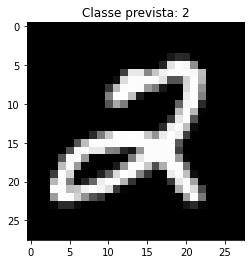

In [29]:
plt.imshow(image_test.numpy().reshape(28, 28), cmap = 'gray')
plt.title('Classe prevista: ' + str(preds[0]))

---

(ADENDO: Minha tentativa anterior de implementar os estimadores usando a API de baixo nível. Deixei caso mudemos de ideia. Não deu certo.)

In [30]:
# def model_fn(features, labels, mode):
    
#     filters = {
#         'convolucao1' : tf.Variable(tf.random.normal(shape = [5, 5, 1, 32])),
#         'convolucao2' : tf.Variable(tf.random.normal(shape = [5, 5, 32, 64]))
#     }

#     weights = {
#         'dense' : tf.Variable(tf.random.normal(shape = [3136, 1024])),
#         'out' : tf.Variable(tf.random.normal(shape = [1024, 10]))
#     }

#     biases = {
#         'dense' : tf.Variable(tf.random.normal(shape = [1024])),
#         'out' : tf.Variable(tf.random.normal(shape = [10]))
#     }

#     def model(features, filters, weights, biases):
#         entrada = tf.cast(features, tf.float32)
#         print(1)
#         convolucao1 = tf.nn.conv2d(input = entrada, filters = filters['convolucao1'], strides = 1, padding = 'SAME')
#         convolucao1 = tf.nn.relu(convolucao1)
#         print(2)
#         pooling1 = tf.nn.max_pool2d(input = convolucao1, ksize = [2, 2], strides = 2, padding = 'VALID')
#         print(3)
#         convolucao2 = tf.nn.conv2d(input = pooling1, filters = filters['convolucao2'], strides = 1, padding = 'SAME')
#         convolucao2 = tf.nn.relu(convolucao2)
#         print(4)
#         pooling2 = tf.nn.max_pool2d(input = convolucao2, ksize = [2, 2], strides = 2, padding = 'VALID')
#         print(5)
#         flattening = tf.reshape(pooling2, [-1, pooling2.shape[1] * pooling2.shape[2] * pooling2.shape[3]])
#         print(6)
#         dense = tf.add(tf.matmul(flattening, weights['dense']), biases['dense'])
#         dense = tf.nn.relu(dense)
#         print(7)
#         if mode == tf.estimator.ModeKeys.TRAIN:
#             dense = tf.nn.dropout(x = dense, rate = 0.2)
#         print(8)
#         out = tf.add(tf.matmul(dense, weights['out']), biases['out'])

#         return out

#     if mode == tf.estimator.ModeKeys.TRAIN:
#         print(0)
#         loss = lambda: tf.keras.losses.sparse_categorical_crossentropy(y_true = labels, y_pred = model(features,), from_logits = True)
#         print(9)
#         optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
#         print(10)
#         var_list = [*list(filters.values()), *list(weights.values()), *list(biases.values())]
#         print(11)
#         train_op = optimizer.minimize(loss, [var_list])
#         print(12)
#         return tf.estimator.EstimatorSpec(mode = mode, loss = loss(), train_op = train_op)

#     if mode == tf.estimator.ModeKeys.EVAL:
#         eval_metric_ops = {'accuracy': tf.keras.metrics.Accuracy()}
#         return tf.estimator.EstimatorSpec(mode = mode, loss = loss(), eval_metric_ops = eval_metric_ops) 

#     if mode == tf.estimator.ModeKeys.PREDICT:
#         predictions = tf.argmax(out, axis = 1)
#         return tf.estimator.EstimatorSpec(mode = mode, predictions = predictions)        